In [1]:
# parameter estimation of the gaussian mixture models fit on a sample dataset

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture as gmm
from sklearn.model_selection import StratifiedKFold

from scipy.stats import multivariate_normal


In [6]:
# load and preprocess sample dataset

ds = datasets.load_iris()
N_Classes = len(np.unique(ds.target))
print('Number of classes: ',N_Classes)
splitted_dataset = StratifiedKFold(n_splits=4)
idx_train, idx_test = next(iter(splitted_dataset.split(ds.data, ds.target)))


X_train = ds.data[idx_train]
Y_train = ds.target[idx_train]
x_test = ds.data[idx_test]
y_test = ds.target[idx_test]



Number of classes:  3


In [3]:
# generate model
model = gmm(n_components=N_Classes, covariance_type='full', random_state=0)
# initialize the GMM 
model.means_init = np.array([X_train[Y_train == i].mean(axis=0) for i in range(N_Classes)])
fitted_gmm = model.fit(X_train)


In [4]:
# predict train and test
y_pred_train = fitted_gmm.predict(X_train)
y_pred_test = fitted_gmm.predict(x_test)

Acc = [y_pred == y_true for (y_pred, y_true) in zip(y_pred_test, y_test)]
print('Accuracy: ', np.sum(Acc)/len(Acc))

Accuracy:  0.8947368421052632


In [12]:
# evaluate log likelihood of the fitting
score_train = fitted_gmm.score(X_train)
score_test = fitted_gmm.score(x_test)

print('score train: ', score_train)
print('score test: ', score_test)


score train:  -1.3368750788656096
score test:  -1.3246647586567182


(3, 4, 4)
(3, 2, 2)


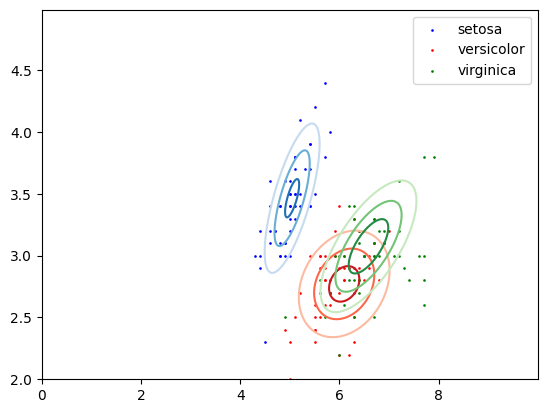

In [5]:
# visualization

mean2d = fitted_gmm.means_[:,:2]
cov2d = fitted_gmm.covariances_[:,:2,:2]


x, y = np.mgrid[0:10:.01, 2:5:.01]
pos = np.dstack((x, y))
cmaps_list =['Blues', 'Reds', 'Greens']
color_list = ['blue', 'red', 'green']

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for cl in range(N_Classes):
    rv = multivariate_normal(mean2d[cl], cov2d[cl])

    ax2.contour(x, y, rv.pdf(pos), levels = 3, cmap = cmaps_list[cl])
    data = ds.data[ds.target == cl]
    ax2.scatter(data[:, 0], data[:, 1], s=0.8, color=color_list[cl], label=ds.target_names[cl])
ax2.legend()